In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score

In [29]:
#Spliting into training and testing
df = pd.read_csv('./dataset_dataset.csv')
from sklearn.model_selection import train_test_split

In [30]:
df.head()

,Unnamed: 0,user_id,product_id,order_id,eval_set,reordered,#reorders_u,#purchases_u,#first_purchases_u,p(reorder|user)_u,...,p(reorder|aisle_of_prod),#reorders_p,#purchases_p,#first_purchases_p,p(reorder|product)_p,#reorders_up,"p(reorder|user,product)_up",reordered_in_last_order,reordered_in_2ndlast_order,reordered_in_3rdlast_order
0,0,1,196,1187899,cv,1.0,0.015431,0.018313,0.023448,0.694915,...,0.638832,0.069720,0.075736,0.108160,0.776480,0.092784,1.000000,1,1,1
1,1,1,14084,1187899,cv,0.0,0.015431,0.018313,0.023448,0.694915,...,0.692551,0.032420,0.033718,0.040714,0.810982,0.000000,0.000000,0,0,0
2,2,1,12427,1187899,cv,0.0,0.015431,0.018313,0.023448,0.694915,...,0.591986,0.012034,0.013702,0.022689,0.740735,0.092784,1.000000,1,1,1
3,3,1,26088,1187899,cv,1.0,0.015431,0.018313,0.023448,0.694915,...,0.591986,0.003412,0.005337,0.015712,0.539041,0.010309,0.111111,0,0,0
4,4,1,26405,1187899,cv,1.0,0.015431,0.018313,0.023448,0.694915,...,0.528005,0.001345,0.002567,0.009154,0.441516,0.010309,0.111111,0,0,0


In [31]:
y = df['reordered']
del df['eval_set']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474661 entries, 0 to 8474660
Data columns (total 41 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   user_id                         int64  
 2   product_id                      int64  
 3   order_id                        int64  
 4   reordered                       float64
 5   #reorders_u                     float64
 6   #purchases_u                    float64
 7   #first_purchases_u              float64
 8   p(reorder|user)_u               float64
 9   mean_#reorders_u                float64
 10  median_#reorders_u              float64
 11  min_#reorders_u                 float64
 12  max_#reorders_u                 float64
 13  mean_#purchases_u               float64
 14  median_#purchases_u             float64
 15  min_#purchases_u                float64
 16  max_#purchases_u                float64
 17  mean_#first_purchases_u    

In [32]:

del df['reordered']

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df, y, test_size=0.30, random_state=5)

In [34]:
Xtrain.shape
Xtest.shape
ytrain.shape
ytest.shape

(2542399,)

In [35]:
ytrain=ytrain.ravel()
ytest=ytest.ravel()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score

In [37]:
#buidling logistic regression
clf=(LogisticRegression(C=0.02))

In [38]:
#fitting the model
clf.fit(Xtrain, ytrain)

LogisticRegression(C=0.02)

In [39]:
train=clf.predict(Xtrain)

In [40]:
print(recall_score(train,ytrain))

0.0


/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print(accuracy_score(train,ytrain))

0.9021024357993629


In [42]:
print(precision_score(train,ytrain))

0.0


In [44]:
#On test data
test=clf.predict(Xtest)

In [45]:
test

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
#accuracy score of Logistic Regression Model
print(accuracy_score(clf.predict(Xtest), ytest))

0.9024268024019834


In [47]:
#print(precision_score(clf.predict(Xtest), ytest))

0.0


In [48]:
#print(recall_score(clf.predict(Xtest), ytest))

0.0


/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Building Random Forest model
clfrf = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, 
                               oob_score=True)

In [52]:
#fitting the model
clfrf.fit(Xtrain, ytrain)

/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_depth=11, max_features='log2',
                       min_samples_split=1000, n_estimators=24, oob_score=True)

In [53]:
train=clf.predict(Xtrain)

In [54]:
print(accuracy_score(train,ytrain))

0.9021024357993629


In [55]:
print(precision_score(train, ytrain))

0.0


In [56]:
print(recall_score(train,ytrain))

0.0


/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
#testting the model
testrf=clfrf.predict(Xtest)

In [59]:
testrf

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
#accuracy score for the random forest model
accuracy_score(testrf, ytest)

0.9088451497974944

In [61]:
#Recall score for the random forest model
recall_score(testrf, ytest)

0.6526873268957257

In [62]:
#Precision score for the random forest model
precision_score(testrf, ytest)

0.14059338090055226

In [63]:
#AUC score for the random forest model
roc_auc_score(testrf, ytest)

0.7835159878255255

<AxesSubplot:>

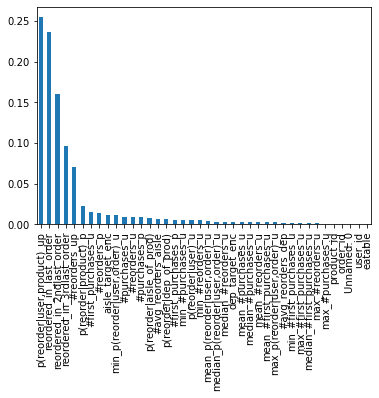

In [64]:
feature_imp_reorder = pd.Series(clfrf.feature_importances_,index= df.columns)
feature_imp_reorder.sort_values(ascending=False).plot(kind='bar')

Looking at the feature importances for predicting whether a product will be reoredered or not, the most important features we observed are order_number, department, product, days since prior order and aisle

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
#AdaBoost Classifier buiding
clfa = AdaBoostClassifier( n_estimators=24,random_state=True)

In [67]:
#fitting
clfa.fit(Xtrain, ytrain)

AdaBoostClassifier(n_estimators=24, random_state=True)

In [68]:
train = clfa.predict(Xtrain)

In [69]:
#Metrics for the random forest model
print(accuracy_score(train,ytrain))
print(precision_score(train, ytrain))
print(recall_score(train,ytrain))
print(roc_auc_score(testrf, ytest))


0.9071234547631241
0.2005410208108769
0.5733125270743906
0.7835159878255255


In [70]:
#testing
testada = clfa.predict(Xtest)

In [71]:
#Metrics for AdaBoost Classifier

print(accuracy_score(testada, ytest))
print(precision_score(testada, ytest))
print(recall_score(testada, ytest))
print(roc_auc_score(testada, ytest))

0.907144393936593
0.1991454025073568
0.569081903006566
0.7440887422777164


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
clfg= GradientBoostingClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000)

In [74]:
#fitting
clfg.fit(Xtrain, ytrain)

GradientBoostingClassifier(max_depth=11, max_features='log2',
                           min_samples_split=1000, n_estimators=24)

In [75]:
traing = clfg.predict(Xtrain)

In [76]:
#Metrics for Gradient Boosting Model on training Data

print(accuracy_score(traing,ytrain))
print(precision_score(traing,ytrain))
print(recall_score(traing,ytrain))
print(roc_auc_score(traing,ytrain))

0.9098124796241299
0.15065414960551282
0.6769389081455806
0.7959690396329837


In [77]:
testg = clfg.predict(Xtest)

In [78]:
#Metrics for Gradient Boosting Model on Test Data

print(accuracy_score(testg, ytest))
print(precision_score(testg, ytest))
print(recall_score(testg, ytest))
print(roc_auc_score(testg, ytest))

0.9090378811508343
0.14466078123110412
0.652900080052398
0.7837988752721451
